<a href="https://colab.research.google.com/github/InnaK342/NeuralNetworks/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import h5py

In [ ]:
def load_dataset():
  train_dataset = h5py.File('train_catvnoncat.h5', "r")
  X_train = np.array(train_dataset['train_set_x'][:])
  y_train = np.array(train_dataset['train_set_y'][:])
  test_dataset = h5py.File('test_catvnoncat.h5', "r")
  X_test = np.array(test_dataset['test_set_x'][:])
  y_test = np.array(test_dataset['test_set_y'][:])
  return X_train, X_test, y_train, y_test

In [ ]:
class LogisticRegression:

  def __init__(self, w_shape):
    self.w = np.zeros((w_shape, 1))
    self.b = 0.0


  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))


  def train(self, X, y, num_iterations=100, learning_rate=0.01, print_cost=False):
    m = X.shape[1]
    costs = []
    for i in range(num_iterations):
      a = self.sigmoid(self.w.T.dot(X) + self.b)
      cost =  -1 / m * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
      cost = np.squeeze(np.array(cost))
      dz = a - y
      dw = 1 / m * X.dot(dz.T)
      db = 1 / m * np.sum(dz)
      self.w = self.w - learning_rate * dw
      self.b = self.b - learning_rate * db

      if i % 100 == 0:
            costs.append(cost)

            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))


  def predict(self, X):
    m = X.shape[1]
    y_prediction = np.zeros((1, m))
    A = self.sigmoid(self.w.T.dot(X) + self.b)

    for i in range(A.shape[1]):
      if A[0, i] > 0.5:
        y_prediction[0, i] = 1
      else:
        y_prediction[0, i] = 0

    return y_prediction


  def accuracy(self, y_true, y_predict):
    print(f"accuracy: {100 - np.mean(np.abs(y_predict - y_true)) * 100}")

In [ ]:
X_train, X_test, y_train, y_test = load_dataset()

In [ ]:
X_train = X_train.reshape((X_train.shape[0], -1)).T / 255.

In [ ]:
X_test = X_test.reshape((X_test.shape[0], -1)).T / 255.

In [ ]:
y_train = y_train.reshape((1, y_train.shape[0]))

In [ ]:
y_test = y_test.reshape((1, y_test.shape[0]))

In [ ]:
model = LogisticRegression(X_train.shape[0])

In [ ]:
model.train(X_train, y_train, num_iterations=5000, learning_rate=0.001, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.591289
Cost after iteration 200: 0.555796
Cost after iteration 300: 0.528977
Cost after iteration 400: 0.506881
Cost after iteration 500: 0.487880
Cost after iteration 600: 0.471108
Cost after iteration 700: 0.456046
Cost after iteration 800: 0.442350
Cost after iteration 900: 0.429782
Cost after iteration 1000: 0.418164
Cost after iteration 1100: 0.407362
Cost after iteration 1200: 0.397269
Cost after iteration 1300: 0.387802
Cost after iteration 1400: 0.378888
Cost after iteration 1500: 0.370471
Cost after iteration 1600: 0.362500
Cost after iteration 1700: 0.354934
Cost after iteration 1800: 0.347737
Cost after iteration 1900: 0.340877
Cost after iteration 2000: 0.334326
Cost after iteration 2100: 0.328061
Cost after iteration 2200: 0.322060
Cost after iteration 2300: 0.316304
Cost after iteration 2400: 0.310776
Cost after iteration 2500: 0.305460
Cost after iteration 2600: 0.300342
Cost after iteration 2700: 0.295411
Cost

In [ ]:
predictions_train = model.predict(X_train)

In [ ]:
predictions_test = model.predict(X_test)

In [ ]:
print(predictions_train)

[[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
  1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
  0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
model.accuracy(predictions_train, y_train)

accuracy: 96.65071770334929


In [ ]:
model.accuracy(predictions_test, y_test)

accuracy: 74.0


In [ ]:
X_train, X_test, y_train, y_test = load_dataset()

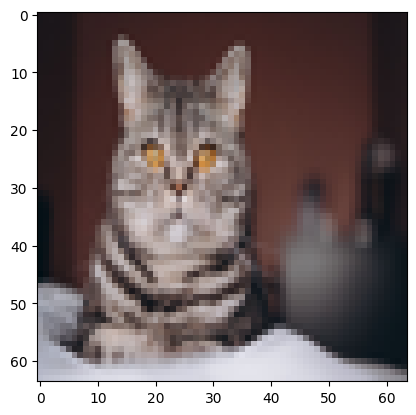

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
image = np.array(Image.open('cat.jpg').resize((64, 64)))
plt.imshow(image)

In [ ]:
image = image / 255.
image = image.reshape((1, 64 * 64 * 3)).T

In [ ]:
model.predict(image)

array([[1.]])

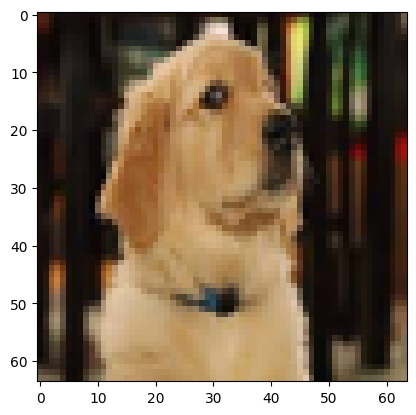

In [ ]:
image_dog = np.array(Image.open('dog.jpeg').resize((64, 64)))
plt.imshow(image_dog)

In [ ]:
model.predict((image_dog / 255.).reshape((1, 64 * 64 * 3)).T)

array([[0.]])